In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import utils.sulfur.constant as const

from utils.TimeCorrelationCalculator import TimeCorrelationCalculator
from utils.TimeCorrelationViewer import TimeCorrelationViewer
from utils.monte_carlo_resampling_operator import MonteCarloResamplingOperator

In [2]:
%%time

animal_name = const.ANIMAL_NAMES[0]
context_name = 'A1postES'

calculator = TimeCorrelationCalculator(animal_name, context_name)
result = calculator.calc(start=90, end=130)
result[0]
#TimeCorrelationViewer(*result).draw(title='A1postES 0-40s in %s' % animal_name)

INFO:numexpr.utils:Note: NumExpr detected 12 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.


CPU times: user 2min 18s, sys: 427 ms, total: 2min 18s
Wall time: 2min 18s


In [3]:
shuffle_calculator = result[0]
df = shuffle_calculator.shuffle_dfs
df

,0,1,2,3,4,5,6,7,8,9,...,1590,1591,1592,1593,1594,1595,1596,1597,1598,1599
0,0.406788,-0.002105,0.000229,-0.004225,-0.010294,-0.011418,0.001629,0.017355,-0.012841,0.086842,...,0.028122,-0.004406,0.005635,0.029612,0.019854,0.013079,0.020988,-0.006731,-0.009208,0.389435
1,0.579606,-0.004354,-0.009358,0.016018,-0.004087,0.040975,-0.003101,0.017623,0.053224,0.049327,...,0.000776,0.000064,0.047037,-0.007851,0.007166,-0.01008,-0.01659,0.033639,-0.013652,0.442272
2,0.56677,-0.002699,-0.006789,-0.012601,0.007094,-0.000105,-0.00992,0.030781,-0.012729,0.059559,...,0.003214,0.057739,0.026868,0.012711,0.002036,-0.008272,0.007342,0.021518,0.009565,0.379987
3,0.428565,0.01184,-0.008075,0.018777,0.001118,0.002446,0.001681,0.004483,0.024944,0.02331,...,0.001484,-0.016746,-0.013317,0.007203,-0.002326,-0.002775,0.015391,-0.013092,-0.002956,0.455693
4,0.335701,0.054492,-0.009502,0.002762,0.019815,0.017633,0.008414,0.02093,0.032519,0.108104,...,-0.009979,0.060887,-0.003085,0.054445,-0.007228,0.014787,0.036769,0.025212,0.009936,0.398999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.408322,0.049717,0.008444,0.014075,0.003562,0.003788,-0.014605,-0.015279,-0.011179,0.022817,...,0.051615,0.02498,0.012627,0.057454,0.076127,0.006912,0.005148,0.100112,0.030355,0.442545
996,0.444238,-0.014563,-0.005371,0.004736,-0.002552,-0.011123,0.007627,0.001377,-0.007635,-0.012943,...,0.029426,0.027107,0.003834,0.04833,0.007758,0.010494,-0.005985,0.02588,0.042468,0.320205
997,0.533484,-0.015395,0.001948,-0.013839,0.025016,0.008637,0.011957,0.013933,0.014718,0.001002,...,0.027881,0.04263,-0.013077,0.021334,-0.012512,0.025222,0.023358,0.013155,0.0032,0.391907
998,0.449685,-0.003892,-0.009408,-0.005351,0.005939,-0.000724,-0.006792,-0.005511,-0.008992,0.0161,...,0.012891,0.10212,-0.009618,0.025794,0.016837,-0.005716,0.008222,-0.000221,0.050711,0.37492


In [4]:
mc = MonteCarloResamplingOperator()
mc.model

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_404a3878afe87d0b776df5172a45ee1a NOW.


In [ ]:
plt.hist(df.iloc[:, 1], bins=15)

In [5]:
%%time

items = df.iloc[:, 1]
fit = mc.resampling(items)

To run all diagnostics call pystan.check_hmc_diagnostics(fit)


CPU times: user 23 ms, sys: 132 ms, total: 155 ms
Wall time: 563 ms


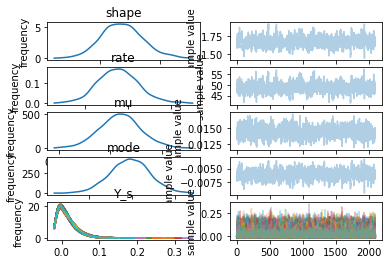

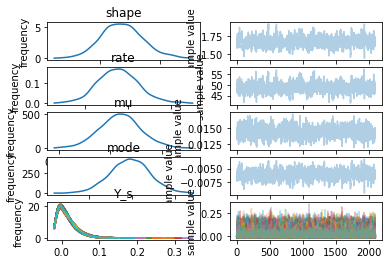

In [7]:
fit.plot()

In [8]:
fit


For the full summary use 'print(fit)'

Inference for Stan model: anon_model_404a3878afe87d0b776df5172a45ee1a.
3 chains, each with iter=1000; warmup=300; thin=1; 
post-warmup draws per chain=700, total post-warmup draws=2100.

           mean se_mean     sd    2.5%     25%     50%     75%   97.5%  n_eff   Rhat
shape      1.67  3.5e-3   0.07    1.54    1.63    1.67    1.72    1.82    415    1.0
rate       48.9    0.12    2.4   44.17   47.28   48.88   50.43   53.97    390   1.01
mu         0.01  2.0e-5 8.1e-4    0.01    0.01    0.01    0.01    0.02   1621    1.0
mode    -6.1e-3  3.8e-5 9.1e-4 -7.9e-3 -6.7e-3 -6.1e-3 -5.5e-3 -4.3e-3    589    1.0
Y_s[1]     0.01  5.7e-4   0.03   -0.02 -5.2e-3  8.2e-3    0.03    0.08   2141    1.0
Y_s[2]     0.02  5.7e-4   0.03   -0.02 -4.9e-3  8.4e-3    0.03    0.09   2291    1.0
Y_s[3]     0.01  6.0e-4   0.03   -0.02 -4.9e-3  7.6e-3    0.03    0.08   1892    1.0
Y_s[4]     0.01  5.6e-4   0.03   -0.02 -5.2e-3  7.9e-3    0.03    0.08   2186    1.0
Y_s[5]  

In [9]:
ddf = pd.DataFrame(fit.extract('Y_s')['Y_s'])
ddf

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0.099519,0.022753,0.011038,-0.014944,0.024367,-0.008926,0.029964,0.018948,0.024403,-0.005597,...,0.021796,0.003718,-0.002166,0.043742,-0.017804,0.032503,-0.016638,0.026566,0.012331,-0.000837
1,0.003408,0.004089,0.049176,-0.001979,0.026533,0.004755,-0.001040,0.018310,-0.008188,0.000003,...,0.012058,0.055024,0.002043,0.049149,-0.015206,-0.007919,0.061129,-0.000985,-0.007813,0.021098
2,-0.019157,0.024688,-0.001859,0.024212,0.009966,-0.002144,0.047068,0.001893,0.005337,0.068553,...,0.002349,-0.006366,-0.012115,0.027090,0.053176,-0.012539,0.006531,0.086161,-0.005243,0.041770
3,0.041995,-0.003441,0.039252,0.004787,0.023618,0.006822,0.083728,0.051622,-0.005516,0.025409,...,-0.010266,0.018420,0.013502,0.002448,0.074330,0.006134,0.030292,-0.013105,0.002678,0.005437
4,0.017566,0.053137,0.029692,-0.008007,0.008889,0.013276,-0.004332,0.035541,-0.010363,0.058400,...,0.036390,-0.012884,0.017049,0.030819,0.018342,-0.000289,-0.004306,0.004046,-0.013752,-0.001206
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2095,-0.004539,-0.002211,0.046890,-0.005533,0.001472,-0.015015,0.073621,-0.006631,0.031768,0.066011,...,-0.019742,0.000761,0.030092,0.037022,0.006163,-0.018110,-0.007422,0.000249,0.016298,0.029519
2096,-0.015972,0.000325,0.008363,-0.008325,0.005845,-0.004549,0.001950,-0.013060,0.012400,-0.000623,...,0.016513,0.037924,0.048115,-0.006792,0.006593,0.091396,0.036441,0.010281,0.007495,0.006555
2097,-0.015521,0.046911,-0.008174,-0.016500,-0.004077,0.005915,-0.014791,0.025181,-0.017640,0.015454,...,0.044099,0.005051,0.018485,0.000873,-0.004911,0.080059,0.023037,0.027576,-0.009352,-0.015196
2098,0.035193,-0.002942,0.005414,0.020439,0.018726,-0.012105,0.048434,-0.003894,0.019847,0.011449,...,-0.008038,-0.003434,0.028913,0.000972,-0.012548,-0.013010,-0.016969,0.003937,0.024539,-0.017517


In [14]:
mode = np.mean(fit.extract('mode')['mode'])
mode

-0.006109783777526331

In [ ]:
resampling = mc.resamplings(df)
resampling

In [ ]:
TimeCorrelationViewer(resampling, result[1], result[2]).draw(title='A1postES 0-40s in %s' % animal_name)